### GD Batch

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
X = [1,1,2,3,4,5,6,7,8,9,10,11]
x = np.array([float(i) for i in X ])
Y = [1,2,3,1,4,5,6,4,7,10,15,9]
y = np.array([float(i) for i in Y ])
y

array([ 1.,  2.,  3.,  1.,  4.,  5.,  6.,  4.,  7., 10., 15.,  9.])

In [50]:
df = pd.DataFrame([*zip(x,y)])
df.columns =["x","y"]

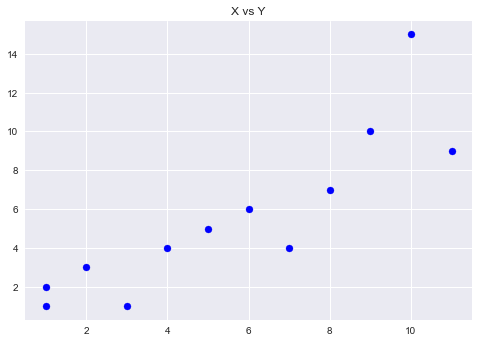

In [51]:
plt.style.use('seaborn')
plt.title("X vs Y")
plt.scatter(x,y,color="blue",label="XY")
plt.show()

In [52]:
theta = np.array([0.0,0.0])
alpha = 0.0001
n = len(x)
features = np.array([np.ones(n),x]).T
h_theta = features.dot(theta)
h_theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [53]:
cost_func = (1/(2*n)) * sum((h_theta - y)**2)
cost_func

23.458333333333332

In [54]:
theta_new = np.array([0.0,0.0])


In [55]:
itera = 0 
while cost_func > 0.1 and itera < 10000:
    theta_new[0] = theta[0] - (alpha * (1/(n)) * sum ((h_theta.T-y) * features[:,0]))
    
    theta_new[1] = theta[1] - (alpha * (1/(n)) * sum ((h_theta.T-y) * features[:,1]))
    theta[0] = theta_new[0]
    theta[1] = theta_new[1]
    h_theta = features.dot(theta)
    cost_func = (1/(2*n))*sum((h_theta - y)**2)
    itera +=1

print(cost_func)

1.917986105442334


In [56]:
h_theta = features.dot(theta)
h_theta

array([ 1.05673001,  1.05673001,  2.05920831,  3.06168661,  4.06416491,
        5.06664321,  6.06912151,  7.0715998 ,  8.0740781 ,  9.0765564 ,
       10.0790347 , 11.081513  ])

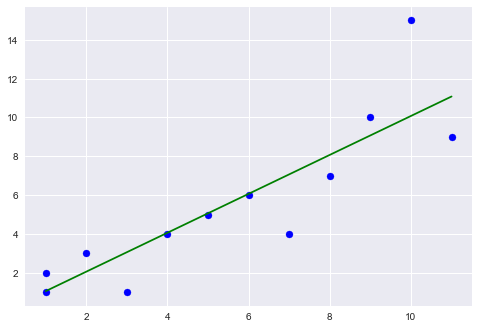

In [57]:
plt.style.use('seaborn')
plt.scatter(x,y,color="blue")
plt.plot(x,h_theta,color="green")
plt.show()

### Mini-Batch

In [58]:
X = [1,1,2,3,4,5,6,7,8,9,10,11]
x = np.array([float(i) for i in X ])
Y = [1,2,3,1,4,5,6,4,7,10,15,9]
y = np.array([float(i) for i in Y ])
y

array([ 1.,  2.,  3.,  1.,  4.,  5.,  6.,  4.,  7., 10., 15.,  9.])

In [59]:
theta = np.array([0.0,0.0])
alpha = 0.0001
b = 3
m = len(x)
features = np.array([np.ones(n),x]).T
h_theta = features[0:b,:].dot(theta)
h_theta

array([0., 0., 0.])

In [60]:
cost_func = (1/(2*b)) * sum((h_theta - y[:b,])**2)
cost_func

2.333333333333333

In [61]:
theta_new = np.array([0.0,0.0])

In [62]:
itera = 0 
while cost_func > 0.1 and itera < 10000:
    for i in range(b):
        theta_new[0] = theta[0] - (alpha * (1/(n)) * sum ((h_theta[4*(i-1):4*i,].T-y[4*(i-1):4*i,]) * features[4*(i-1):4*i,0]))

        theta_new[1] = theta[1] - (alpha * (1/(n)) * sum ((h_theta[4*(i-1):4*i,].T-y[4*(i-1):4*i,]) * features[4*(i-1):4*i,1]))
        theta[0] = theta_new[0]
        theta[1] = theta_new[1]
        h_theta = features.dot(theta)
    cost_func = (1/(2*n))*sum((h_theta - y)**2)
    itera +=1

print(cost_func)

2.7777396007355524


In [63]:
h_theta = features.dot(theta)
h_theta

array([1.05747147, 1.05747147, 1.83073771, 2.60400394, 3.37727018,
       4.15053642, 4.92380266, 5.69706889, 6.47033513, 7.24360137,
       8.01686761, 8.79013385])

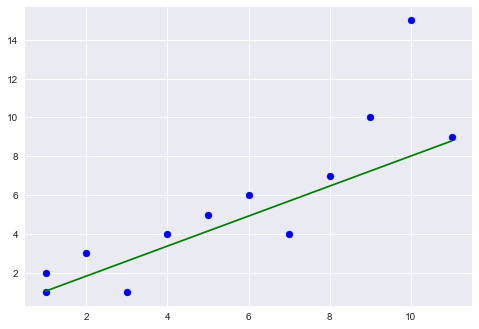

In [64]:
plt.style.use('seaborn')
plt.scatter(x,y,color="blue")
plt.plot(x,h_theta,color="green")
plt.show()

### stochastic GD.

In [65]:
X = [1,1,2,3,4,5,6,7,8,9,10,11]
x = np.array([float(i) for i in X ])
Y = [1,2,3,1,4,5,6,4,7,10,15,9]
y = np.array([float(i) for i in Y ])
y

array([ 1.,  2.,  3.,  1.,  4.,  5.,  6.,  4.,  7., 10., 15.,  9.])

In [66]:
theta = np.array([0.0,0.0])
alpha = 0.0001
b = 3
m = len(x)
features = np.array([np.ones(n),x]).T
h_theta = features.dot(theta)
h_theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [67]:
cost_func =(h_theta[0,] - y[0,])**2
cost_func

1.0

In [68]:
theta_new = np.array([0.0,0.0])

In [69]:
itera = 0 
while cost_func > 0.1 and itera < 10000:
    for i in range(m):
        theta_new[0] = theta[0] - (alpha * (h_theta[i,] - y[i,]) * features[i,0])

        theta_new[1] = theta[1] - (alpha * (h_theta[i,] - y[i,]) * features[i,1])
        theta[0] = theta_new[0]
        theta[1] = theta_new[1]
        h_theta = features.dot(theta)
    costfunc = (h_theta[i,] - y[i,])**2
    itera +=1

print(costfunc)

4.862288486542771


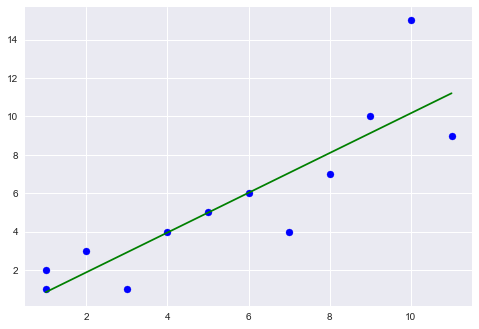

In [70]:
plt.style.use('seaborn')
plt.scatter(x,y,color="blue")
plt.plot(x,h_theta,color="green")
plt.show()